In [2]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("daily_atmoshphere_data.csv")


print("Original Data:")
print(data.head())


missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Original Data:
   Unnamed: 0  year  month  day   cycle   trend
0           0  2013      1   20  395.64  394.42
1           1  2013      1   21  395.67  394.43
2           2  2013      1   22  395.70  394.44
3           3  2013      1   23  395.72  394.44
4           4  2013      1   24  395.75  394.45

Missing Values:
Unnamed: 0    0
year          0
month         0
day           0
cycle         0
trend         0
dtype: int64


In [3]:
import pickle

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select only the columns to be scaled (cycle and trend)
scaled_data = data[['cycle', 'trend']]

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(scaled_data)
scaled_data_minmax = pd.DataFrame(scaled_data_minmax, columns=['cycle_scaled_minmax', 'trend_scaled_minmax'])

# Standardization
scaler_standard = StandardScaler()
scaled_data_standard = scaler_standard.fit_transform(scaled_data)
scaled_data_standard = pd.DataFrame(scaled_data_standard, columns=['cycle_scaled_standard', 'trend_scaled_standard'])

# Concatenate the scaled data with the original data
scaled_data = pd.concat([data, scaled_data_minmax, scaled_data_standard], axis=1)

# Display the scaled data
print("Scaled Data (Min-Max Scaling):")
print(scaled_data[['cycle', 'trend', 'cycle_scaled_minmax', 'trend_scaled_minmax']].head())

print("\nScaled Data (Standardization):")
print(scaled_data[['cycle', 'trend', 'cycle_scaled_standard', 'trend_scaled_standard']].head())


Scaled Data (Min-Max Scaling):
    cycle   trend  cycle_scaled_minmax  trend_scaled_minmax
0  395.64  394.42             0.108844             0.000000
1  395.67  394.43             0.109918             0.000414
2  395.70  394.44             0.110992             0.000828
3  395.72  394.44             0.111708             0.000828
4  395.75  394.45             0.112782             0.001242

Scaled Data (Standardization):
    cycle   trend  cycle_scaled_standard  trend_scaled_standard
0  395.64  394.42              -1.501174              -1.715189
1  395.67  394.43              -1.497145              -1.713803
2  395.70  394.44              -1.493115              -1.712416
3  395.72  394.44              -1.490429              -1.712416
4  395.75  394.45              -1.486399              -1.711029


ADF Statistic: -1.309
p-value: 0.625
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF test result: Time series is non-stationary.


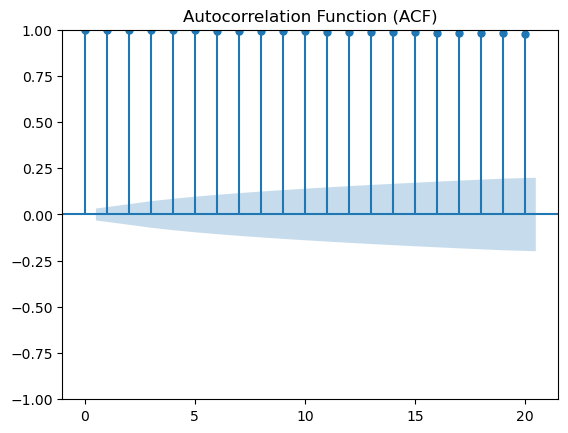

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


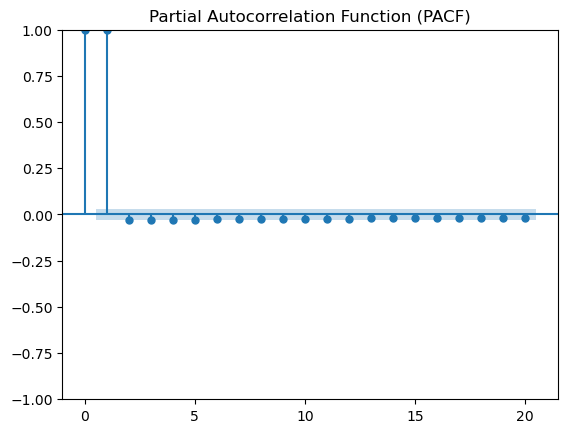

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  cycle   No. Observations:                 3720
Model:                 ARIMA(1, 0, 1)   Log Likelihood                8406.027
Date:                Tue, 14 May 2024   AIC                         -16804.054
Time:                        05:02:48   BIC                         -16779.168
Sample:                             0   HQIC                        -16795.200
                               - 3720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.1091     17.249     23.602      0.000     373.302     440.916
ar.L1          1.0000      0.000   9823.334      0.000       1.000       1.000
ma.L1          0.8361      0.009     91.302      0.0

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller  ## ARIMA
import matplotlib.pyplot as plt

# Step 1: Check Stationarity
def check_stationarity(timeseries):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))
    if result[1] <= 0.05:
        print("ADF test result: Time series is stationary.")
    else:
        print("ADF test result: Time series is non-stationary.")

check_stationarity(data['cycle'])

# Step 2: Identify Parameters (p, d, q)
# We can use ACF and PACF plots to identify the parameters.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['cycle'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data['cycle'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Step 3: Train the ARIMA Model
# For simplicity, let's assume (p, d, q) = (1, 0, 1) based on ACF/PACF plots
arima_model = ARIMA(data['cycle'], order=(1, 0, 1))
arima_result = arima_model.fit()

# Step 4: Evaluate the Model
print(arima_result.summary())

# Forecasting
forecast = arima_result.forecast(steps=7)  # Forecasting 7 days ahead
print("Forecasted CO2 Levels (cycle):")
print(forecast)


In [66]:
arima_model = ARIMA(data['cycle'], order=(1, 0, 1))
arima_result = arima_model.fit()

# Save ARIMA model results using pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_result, f)

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error ##NERUAL NETWORK



# Prepare features and target variable
X = data[['year', 'month', 'day', 'trend']]  # Selecting features
y = data['cycle']  # Selecting target variable

# Data preprocessing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model design
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model training
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

# Model evaluation
loss, mae = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test MAE:", mae)

# Predictions
predictions = model.predict(X_test)

# Calculate additional evaluation metrics if needed
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Epoch 1/150
38/38 [==============================] - 2s 11ms/step - loss: 163664.2656 - mae: 404.4899 - val_loss: 159923.0781 - val_mae: 399.8549
Epoch 2/150
38/38 [==============================] - 0s 4ms/step - loss: 145204.7500 - mae: 380.6768 - val_loss: 115731.0078 - val_mae: 339.9539
Epoch 3/150
38/38 [==============================] - 0s 4ms/step - loss: 66605.3594 - mae: 246.0628 - val_loss: 14410.3301 - val_mae: 102.5126
Epoch 4/150
38/38 [==============================] - 0s 4ms/step - loss: 9274.0215 - mae: 78.4205 - val_loss: 8156.5254 - val_mae: 73.8484
Epoch 5/150
38/38 [==============================] - 0s 4ms/step - loss: 7540.2437 - mae: 70.3789 - val_loss: 7338.0830 - val_mae: 69.9495
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 6854.6431 - mae: 67.0446 - val_loss: 6621.3682 - val_mae: 66.3085
Epoch 7/150
38/38 [==============================] - 0s 4ms/step - loss: 6097.4565 - mae: 63.2741 - val_loss: 5879.0625 - val_mae: 62.3691
Epoch 8/15

Epoch 62/150
38/38 [==============================] - 0s 3ms/step - loss: 2.5201 - mae: 1.3222 - val_loss: 2.9225 - val_mae: 1.3592
Epoch 63/150
38/38 [==============================] - 0s 3ms/step - loss: 2.5072 - mae: 1.3186 - val_loss: 2.7510 - val_mae: 1.3421
Epoch 64/150
38/38 [==============================] - 0s 3ms/step - loss: 2.4811 - mae: 1.3160 - val_loss: 2.7894 - val_mae: 1.3434
Epoch 65/150
38/38 [==============================] - 0s 3ms/step - loss: 2.5001 - mae: 1.3242 - val_loss: 2.8150 - val_mae: 1.3471
Epoch 66/150
38/38 [==============================] - 0s 3ms/step - loss: 2.4723 - mae: 1.3120 - val_loss: 2.6973 - val_mae: 1.3523
Epoch 67/150
38/38 [==============================] - 0s 3ms/step - loss: 2.4905 - mae: 1.3155 - val_loss: 2.6760 - val_mae: 1.3436
Epoch 68/150
38/38 [==============================] - 0s 3ms/step - loss: 2.4581 - mae: 1.3111 - val_loss: 2.6840 - val_mae: 1.3354
Epoch 69/150
38/38 [==============================] - 0s 3ms/step - loss: 2.

Epoch 124/150
38/38 [==============================] - 0s 3ms/step - loss: 1.6166 - mae: 1.0848 - val_loss: 1.5542 - val_mae: 1.0536
Epoch 125/150
38/38 [==============================] - 0s 4ms/step - loss: 1.5119 - mae: 1.0530 - val_loss: 1.4192 - val_mae: 1.0102
Epoch 126/150
38/38 [==============================] - 0s 4ms/step - loss: 1.4883 - mae: 1.0449 - val_loss: 1.6635 - val_mae: 1.0722
Epoch 127/150
38/38 [==============================] - 0s 3ms/step - loss: 1.5377 - mae: 1.0500 - val_loss: 1.9742 - val_mae: 1.1543
Epoch 128/150
38/38 [==============================] - 0s 3ms/step - loss: 1.4844 - mae: 1.0381 - val_loss: 1.5728 - val_mae: 1.0415
Epoch 129/150
38/38 [==============================] - 0s 3ms/step - loss: 1.4162 - mae: 1.0119 - val_loss: 1.4802 - val_mae: 1.0125
Epoch 130/150
38/38 [==============================] - 0s 3ms/step - loss: 1.5211 - mae: 1.0356 - val_loss: 1.4729 - val_mae: 1.0048
Epoch 131/150
38/38 [==============================] - 0s 3ms/step - 

In [5]:
final_date = pd.Timestamp(year=2023, month=3, day=28)

# Number of days for prediction
num_days = 7
                  
# Generate future dates
future_dates = pd.date_range(start=final_date + pd.Timedelta(days=1), periods=num_days)

# Generate corresponding features
future_features = pd.DataFrame({
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day,
    'trend': np.random.rand(num_days)  # Replace this with your actual trend data if available
})

# Scale the features
future_features_scaled = scaler.transform(future_features)

# Make predictions
future_predictions = model.predict(future_features_scaled)

print("Predicted Cycle Values for Future Dates:")
print(future_predictions)

1/1 [==============================] - 0s 16ms/step
Predicted Cycle Values for Future Dates:
[[1024.0239]
 [1024.1525]
 [1022.2701]
 [1040.8762]
 [1039.4231]
 [1039.3911]
 [1038.4552]]


In [67]:
with open('Ann.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'predictions': predictions,
        'future_predictions': future_predictions,
        'mse': mse,
        'mae': mae
    }, f)

print("Results pickled and saved as 'Ann.pkl'")

Results pickled and saved as 'Ann.pkl'


In [6]:
future_predictions_df = pd.DataFrame(future_predictions, columns=['predicted_cycle'], index=future_dates)
future_predictions_df


,predicted_cycle
2023-03-29,1024.023926
2023-03-30,1024.152466
2023-03-31,1022.270081
2023-04-01,1040.876221
2023-04-02,1039.423096
2023-04-03,1039.391113
2023-04-04,1038.455200


ADF Statistic: -1.3085820150877383
p-value: 0.625236942313377
Critical Values:
	1%: -3.4321238834701946
	5%: -2.8623238033826905
	10%: -2.5671872299953833
ADF test result: Time series is non-stationary.


<Figure size 1200x600 with 0 Axes>

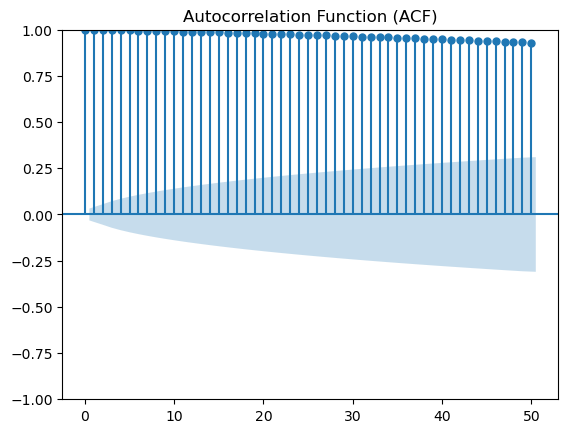

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

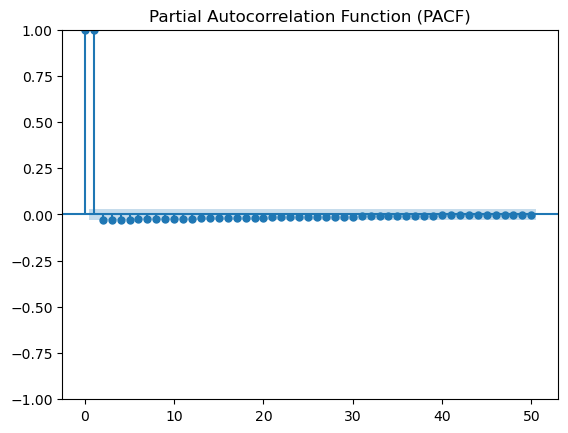

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible

Forecasted CO2 Levels (cycle) for the next 7 days:
2023-03-29    420.532908
2023-03-30    420.540442
2023-03-31    420.557800
2023-04-01    420.565348
2023-04-02    420.573892
2023-04-03    420.590104
2023-04-04    420.598811
Freq: D, Name: predicted_mean, dtype: float64
SARIMA results pickled and saved as 'sarima_results.pkl'


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pickle

# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Check stationarity using ADF test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    if result[1] <= 0.05:
        print("ADF test result: Time series is stationary.")
    else:
        print("ADF test result: Time series is non-stationary.")

check_stationarity(data['cycle'])

# Plot ACF and PACF for seasonal parameters estimation
plt.figure(figsize=(12, 6))
plot_acf(data['cycle'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['cycle'], lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


sarima_model = SARIMAX(data['cycle'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
sarima_result = sarima_model.fit()

# Forecast for the next 7 days
forecast = sarima_result.forecast(steps=7)

print("Forecasted CO2 Levels (cycle) for the next 7 days:")
print(forecast)

# Pickle the SARIMA results
with open('sarima_results.pkl', 'wb') as f:
    pickle.dump({
        'model': sarima_model,
        'result': sarima_result,
        'forecast': forecast
    }, f)

print("SARIMA results pickled and saved as 'sarima_results.pkl'")


C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


Exponential Smoothing Model AIC: -39091.813114667224
Forecasted CO2 Levels (cycle) for the next 7 days:
1970-01-01 00:00:00.000003720    420.544525
1970-01-01 00:00:00.000003721    420.558094
1970-01-01 00:00:00.000003722    420.571664
1970-01-01 00:00:00.000003723    420.584974
1970-01-01 00:00:00.000003724    420.598856
1970-01-01 00:00:00.000003725    420.612517
1970-01-01 00:00:00.000003726    420.626051
Freq: N, dtype: float64
Exponential Smoothing results pickled and saved as 'ets_results.pkl'


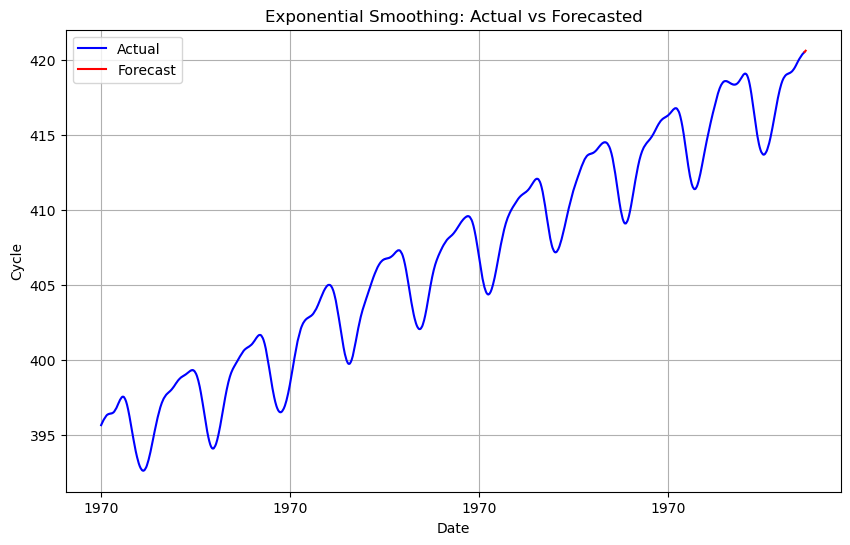

In [14]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pickle



# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Fit the Exponential Smoothing model
# Let's choose Holt-Winters' method with additive trend and seasonality
ets_model = ExponentialSmoothing(data['cycle'], trend='add', seasonal='add', seasonal_periods=7)
ets_result = ets_model.fit()

# Calculate model accuracy
accuracy = ets_result.aic
print("Exponential Smoothing Model AIC:", accuracy)

# Forecast for the next 7 days
forecast = ets_result.forecast(steps=7)

print("Forecasted CO2 Levels (cycle) for the next 7 days:")
print(forecast)

# Pickle the Exponential Smoothing results
with open('ets_results.pkl', 'wb') as f:
    pickle.dump({
        'model': ets_model,
        'result': ets_result,
        'forecast': forecast
    }, f)

print("Exponential Smoothing results pickled and saved as 'ets_results.pkl'")

import matplotlib.pyplot as plt

# Plotting actual data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cycle'], label='Actual', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Cycle')
plt.legend()
plt.grid(True)
plt.show()




Mean Squared Error: 2.0556528775192513
Mean Absolute Error: 1.1348360480330153
SVR Model Accuracy: 0.9637798534112345
SVR results pickled and saved as 'svr_results.pkl'


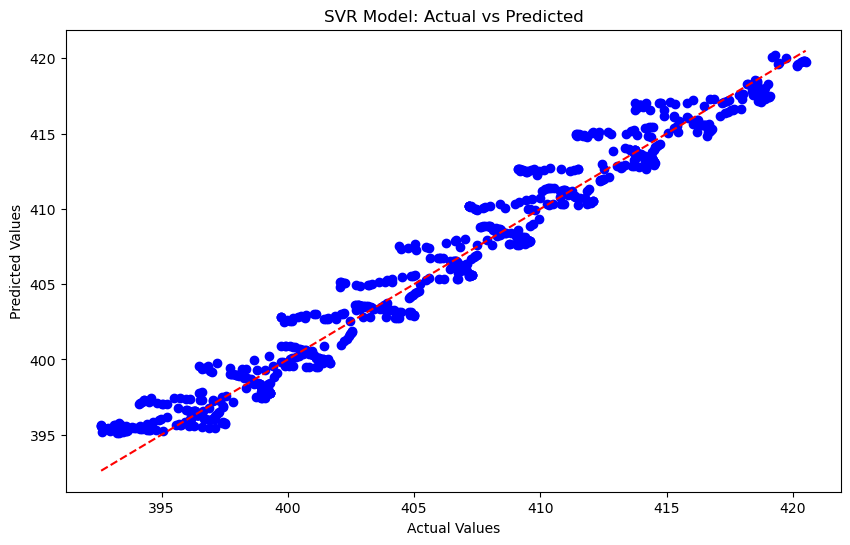

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import matplotlib.pyplot as plt



# Prepare features and target variable
X = data[['year', 'month', 'day', 'trend']]  # Selecting features
y = data['cycle']  # Selecting target variable

# Data preprocessing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train, y_train)

# Model evaluation
y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

accuracy = svr_model.score(X_test, y_test)
print("SVR Model Accuracy:", accuracy)

# Pickle the SVR model and results
with open('svr_results.pkl', 'wb') as f:
    pickle.dump({
        'model': svr_model,
        'y_pred': y_pred,
        'mse': mse,
        'mae': mae,
        'accuracy': accuracy
    }, f)

print("SVR results pickled and saved as 'svr_results.pkl'")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('SVR Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [71]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pickle

# Assuming your data is already loaded into a DataFrame called 'data'
# Assuming 'cycle' is the column you want to forecast

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['cycle']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 7  # You can adjust this based on your preference

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)


# Make predictions
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error (MSE):', mse)

# Pickle the LSTM model and results
with open('lstm_results.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'predictions': predictions,
        'mae': mae,
        'mse': mse
    }, f)

print("LSTM model results pickled and saved as 'lstm_results.pkl'")



Epoch 1/100
93/93 [==============================] - 4s 13ms/step - loss: 0.0371 - val_loss: 0.0022
Epoch 2/100
93/93 [==============================] - 1s 7ms/step - loss: 5.4668e-05 - val_loss: 5.0170e-04
Epoch 3/100
93/93 [==============================] - 1s 7ms/step - loss: 3.4107e-05 - val_loss: 3.1735e-04
Epoch 4/100
93/93 [==============================] - 1s 7ms/step - loss: 3.3381e-05 - val_loss: 2.9934e-04
Epoch 5/100
93/93 [==============================] - 1s 8ms/step - loss: 3.2974e-05 - val_loss: 2.5254e-04
Epoch 6/100
93/93 [==============================] - 1s 7ms/step - loss: 3.0339e-05 - val_loss: 2.4241e-04
Epoch 7/100
93/93 [==============================] - 1s 7ms/step - loss: 3.0329e-05 - val_loss: 2.3073e-04
Epoch 8/100
93/93 [==============================] - 1s 7ms/step - loss: 3.2070e-05 - val_loss: 2.2005e-04
Epoch 9/100
93/93 [==============================] - 1s 7ms/step - loss: 3.1783e-05 - val_loss: 1.5401e-04
Epoch 10/100
93/93 [========================

Epoch 77/100
93/93 [==============================] - 1s 7ms/step - loss: 2.6863e-06 - val_loss: 5.3458e-05
Epoch 78/100
93/93 [==============================] - 1s 7ms/step - loss: 3.8458e-06 - val_loss: 9.2081e-06
Epoch 79/100
93/93 [==============================] - 1s 7ms/step - loss: 4.4413e-06 - val_loss: 8.6867e-06
Epoch 80/100
93/93 [==============================] - 1s 7ms/step - loss: 2.5617e-06 - val_loss: 1.9592e-05
Epoch 81/100
93/93 [==============================] - 1s 8ms/step - loss: 3.8114e-06 - val_loss: 5.7385e-05
Epoch 82/100
93/93 [==============================] - 1s 6ms/step - loss: 3.0510e-06 - val_loss: 1.1979e-05
Epoch 83/100
93/93 [==============================] - 1s 7ms/step - loss: 1.6685e-06 - val_loss: 2.1296e-05
Epoch 84/100
93/93 [==============================] - 1s 6ms/step - loss: 1.1079e-05 - val_loss: 2.8554e-06
Epoch 85/100
93/93 [==============================] - 1s 6ms/step - loss: 2.0217e-06 - val_loss: 2.2825e-05
Epoch 86/100
93/93 [========

HYBRID MODEL

ADF Statistic: -1.309
p-value: 0.625
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF test result: Time series is non-stationary.


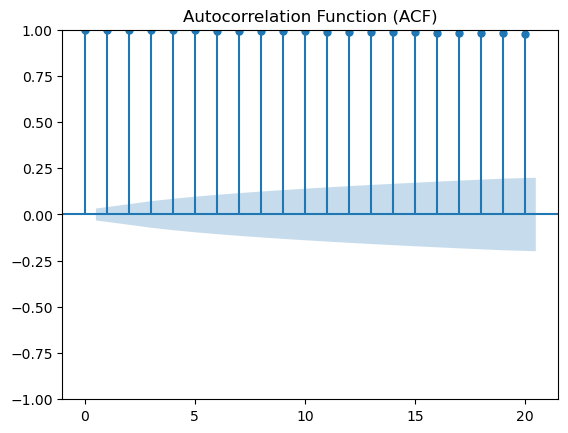

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


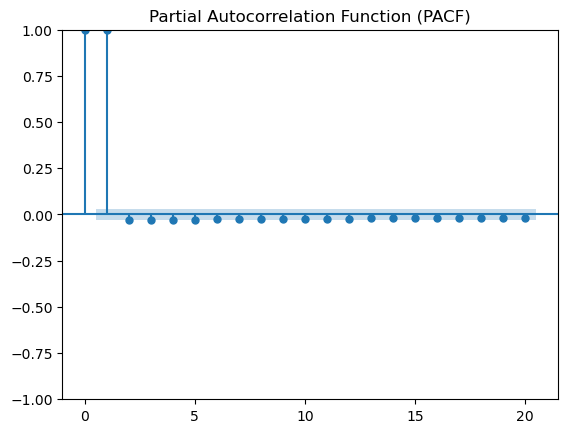

C:\Users\MS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  cycle   No. Observations:                 3720
Model:                 ARIMA(1, 0, 1)   Log Likelihood                8406.027
Date:                Wed, 15 May 2024   AIC                         -16804.054
Time:                        20:12:08   BIC                         -16779.168
Sample:                             0   HQIC                        -16795.200
                               - 3720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.1091     17.249     23.602      0.000     373.302     440.916
ar.L1          1.0000      0.000   9823.334      0.000       1.000       1.000
ma.L1          0.8361      0.009     91.302      0.0

Epoch 48/150
38/38 [==============================] - 0s 3ms/step - loss: 2.8827 - mae: 1.4016 - val_loss: 3.4957 - val_mae: 1.4490
Epoch 49/150
38/38 [==============================] - 0s 3ms/step - loss: 2.8253 - mae: 1.3888 - val_loss: 3.2908 - val_mae: 1.4396
Epoch 50/150
38/38 [==============================] - 0s 3ms/step - loss: 2.8230 - mae: 1.3865 - val_loss: 3.2599 - val_mae: 1.4365
Epoch 51/150
38/38 [==============================] - 0s 3ms/step - loss: 2.8107 - mae: 1.3851 - val_loss: 3.2494 - val_mae: 1.4295
Epoch 52/150
38/38 [==============================] - 0s 4ms/step - loss: 2.8190 - mae: 1.3868 - val_loss: 3.2032 - val_mae: 1.4296
Epoch 53/150
38/38 [==============================] - 0s 3ms/step - loss: 2.7840 - mae: 1.3750 - val_loss: 3.1869 - val_mae: 1.4461
Epoch 54/150
38/38 [==============================] - 0s 3ms/step - loss: 2.7828 - mae: 1.3827 - val_loss: 3.4030 - val_mae: 1.4399
Epoch 55/150
38/38 [==============================] - 0s 3ms/step - loss: 2.

Epoch 110/150
38/38 [==============================] - 0s 3ms/step - loss: 2.3373 - mae: 1.2735 - val_loss: 2.4698 - val_mae: 1.2983
Epoch 111/150
38/38 [==============================] - 0s 4ms/step - loss: 2.2698 - mae: 1.2664 - val_loss: 2.2497 - val_mae: 1.2542
Epoch 112/150
38/38 [==============================] - 0s 4ms/step - loss: 2.2550 - mae: 1.2692 - val_loss: 2.1833 - val_mae: 1.2453
Epoch 113/150
38/38 [==============================] - 0s 3ms/step - loss: 2.1606 - mae: 1.2450 - val_loss: 2.1691 - val_mae: 1.2372
Epoch 114/150
38/38 [==============================] - 0s 4ms/step - loss: 2.1216 - mae: 1.2370 - val_loss: 2.1353 - val_mae: 1.2324
Epoch 115/150
38/38 [==============================] - 0s 3ms/step - loss: 2.1185 - mae: 1.2365 - val_loss: 2.1380 - val_mae: 1.2348
Epoch 116/150
38/38 [==============================] - 0s 3ms/step - loss: 2.1244 - mae: 1.2354 - val_loss: 2.1004 - val_mae: 1.2228
Epoch 117/150
38/38 [==============================] - 0s 3ms/step - 

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



# Step 1: Check Stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))
    if result[1] <= 0.05:
        print("ADF test result: Time series is stationary.")
    else:
        print("ADF test result: Time series is non-stationary.")

# Step 2: Identify Parameters (p, d, q)
def identify_parameters(data):
    plot_acf(data['cycle'], lags=20)
    plt.title('Autocorrelation Function (ACF)')
    plt.show()

    plot_pacf(data['cycle'], lags=20)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.show()

# Step 3: Train the ARIMA Model
def train_arima_model(data):
    arima_model = ARIMA(data['cycle'], order=(1, 0, 1))
    arima_result = arima_model.fit()
    print(arima_result.summary())
    return arima_result

# Step 4: Forecasting with ARIMA
def forecast_arima(arima_model):
    forecast = arima_model.forecast(steps=7)  # Forecasting 7 days ahead
    print("ARIMA Forecasted CO2 Levels (cycle):")
    print(forecast)
    return forecast

# Step 5: Train the ANN Model
def train_ann_model(X_train, y_train):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)
    return model

# Step 6: Forecasting with ANN
def forecast_ann(model, X_test):
    predictions = model.predict(X_test)
    return predictions

def combine_forecasts(arima_model, ann_model, X_test):
    # Step 4: Forecasting with ARIMA for the test set
    arima_forecast = forecast_arima(arima_model)

    # Repeat ARIMA forecast for each time step in the forecast
    arima_forecast_repeated = np.repeat(arima_forecast, len(X_test))

    # Use ARIMA forecast as input features for ANN
    X_test_with_arima_forecast = np.column_stack((X_test, arima_forecast_repeated[:len(X_test)]))

    # Predict residuals using ANN
    ann_residuals = forecast_ann(ann_model, X_test_with_arima_forecast[:,:-1])  # Exclude the last column

    # Combine ARIMA forecast and ANN residuals to get the hybrid forecast
    hybrid_forecast = arima_forecast_repeated[:len(X_test)] + ann_residuals.flatten()

    print("Hybrid Forecasted CO2 Levels (cycle):")
    print(hybrid_forecast)
    return hybrid_forecast

# Main code
# Assuming you have your data loaded into a DataFrame named 'data'

# Step 1: Check Stationarity
check_stationarity(data['cycle'])

# Step 2: Identify Parameters
identify_parameters(data)

# Step 3: Train the ARIMA Model
arima_model = train_arima_model(data)

# Prepare features and target variable for ANN
X = data[['year', 'month', 'day', 'trend']]  # Selecting features
y = data['cycle']  # Selecting target variable

# Data preprocessing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets for ANN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train the ANN Model
ann_model = train_ann_model(X_train, y_train)

# Step 7: Combine ARIMA and ANN forecasts
combine_forecasts(arima_model, ann_model, X_test)

with open('hybrid_forecast.pkl', 'wb') as f:
    pickle.dump(combine_forecasts, f)
